In [1]:
#load the data
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:\\Users\\PC-LENOVO\\Desktop\\ExcelR Assginments\\Random Forest\\Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
df.shape   #(600,6)

(600, 6)

array([[<AxesSubplot:title={'center':'Taxable.Income'}>,
        <AxesSubplot:title={'center':'City.Population'}>],
       [<AxesSubplot:title={'center':'Work.Experience'}>, <AxesSubplot:>]],
      dtype=object)

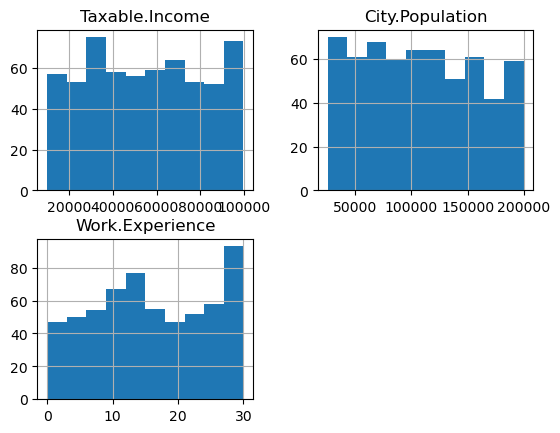

In [5]:
df.hist()

In [6]:
# Create the target variable
df["Taxable.Income"] = df["Taxable.Income"].apply(lambda x: "Risky" if x <= 30000 else "Good")

In [7]:
df["Taxable.Income"]

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: object

In [8]:
#EDA----->EXPLORATORY DATA ANALYSIS
#BOXPLOT AND OUTLIERS CALCULATION #
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
data = df.iloc[:,3:5]

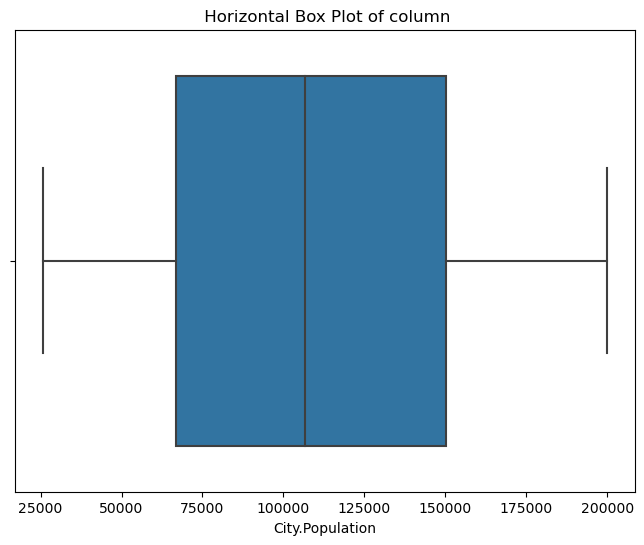

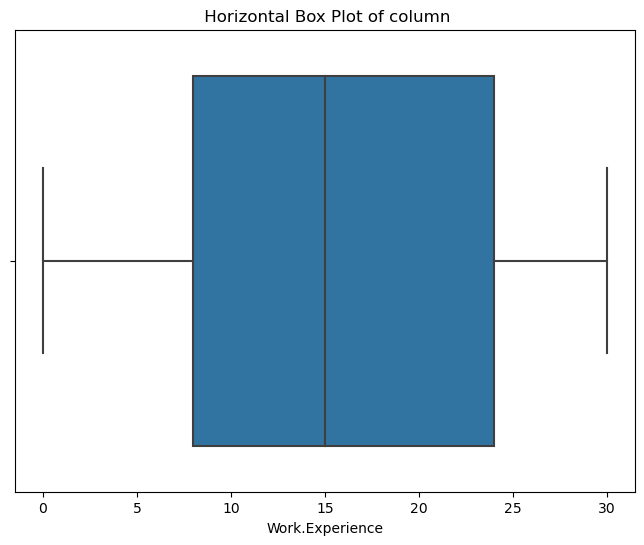

In [10]:
for column in data:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(x=df[column])
    plt.title(" Horizontal Box Plot of column")
    plt.show()

In [11]:
#Removing the outliers
df1 = df.iloc[:,3:5]
df1

,City.Population,Work.Experience
0,50047,10
1,134075,18
2,160205,30
3,193264,15
4,27533,28
...,...,...
595,39492,7
596,55369,2
597,154058,0
598,180083,17


In [12]:
from scipy import stats
# Define a threshold for Z-score (e.g., Z-score greater than 3 or less than -3 indicates an outlier)
z_threshold = 3

In [13]:
# Calculate the Z-scores for each column in the DataFrame
import numpy as np
z_scores = np.abs(stats.zscore(df1))

In [14]:
# Create a mask to identify rows with outliers
outlier_mask = (z_scores > z_threshold).any(axis=1)
outlier_mask

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Length: 600, dtype: bool

In [15]:
# Remove rows with outliers from the DataFrame
df = df[~outlier_mask]
df.shape  #(600, 6)

(600, 6)

array([[<AxesSubplot:title={'center':'City.Population'}>,
        <AxesSubplot:title={'center':'Work.Experience'}>]], dtype=object)

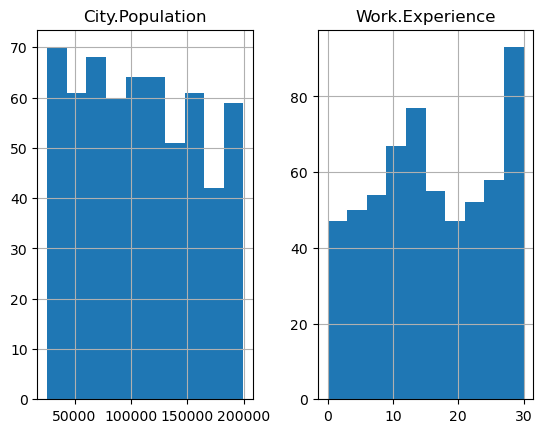

In [16]:
# Outliers were removed from the dataset based on Z-scores.
# Now, df contains the data with outliers removed

#HISTOGRAM BUILDING, SKEWNESS AND KURTOSIS CALCULATION #
df.hist()

In [17]:
df.skew()

C:\Users\PC-LENOVO\AppData\Local\Temp\ipykernel_9220\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


City.Population    0.125009
Work.Experience    0.018529
dtype: float64

In [18]:
df.kurt()

C:\Users\PC-LENOVO\AppData\Local\Temp\ipykernel_9220\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


City.Population   -1.120154
Work.Experience   -1.167524
dtype: float64

In [19]:
df.describe()

,City.Population,Work.Experience
count,600.000000,600.000000
mean,108747.368333,15.558333
std,49850.075134,8.842147
min,25779.000000,0.000000
25%,66966.750000,8.000000
50%,106493.500000,15.000000
75%,150114.250000,24.000000
max,199778.000000,30.000000


In [20]:
#Label Encoding 
# Encode the "Undergrad," "Marital.Status," and "Urban" categorical variables
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [21]:
df["Undergrad"] = LE.fit_transform(df["Undergrad"])

In [22]:
df["Marital.Status"] = LE.fit_transform(df["Marital.Status"])

In [23]:
df["Urban"] = LE.fit_transform(df["Urban"])

In [24]:
# Split the data into features (X) and the target variable (Y)
X = df.drop("Taxable.Income", axis=1)
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [25]:
Y = df["Taxable.Income"]
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: object

In [26]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [27]:
Y1=LE.fit_transform(df["Taxable.Income"])
Y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [28]:
#Data Partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y1,train_size = 0.75,random_state=123)

In [29]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=7,
                        n_estimators=100,
                        max_samples=0.6,
                        max_features=0.7,
                        random_state=123)   

In [30]:
RF.fit(X_train,Y_train)

RandomForestClassifier(max_depth=7, max_features=0.7, max_samples=0.6,
                       random_state=123)

In [31]:
Y_pred_train = RF.predict(X_train)

In [32]:
Y_pred_test = RF.predict(X_test)

In [33]:
#Metrices
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
ac1 = accuracy_score(Y_train,Y_pred_train)
print("Training Accuracy Score:",(ac1*100).round(3))  #Training Accuracy Score: 82.444
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Test Accuracy Score:",(ac2*100).round(3))  #Test Accuracy Score: 79.333

Training Accuracy Score: 82.444
Test Accuracy Score: 79.333


In [34]:
# Confusion matrix and classification report
confusion = confusion_matrix(Y_test, Y_pred_test)
classification_rep = classification_report(Y_test, Y_pred_test)

In [35]:
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Confusion Matrix:
 [[119   1]
 [ 30   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.88       120
           1       0.00      0.00      0.00        30

    accuracy                           0.79       150
   macro avg       0.40      0.50      0.44       150
weighted avg       0.64      0.79      0.71       150



In [36]:
#Grid Search CV
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

In [37]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 7, 9],
    'max_samples': [0.6, 0.7, 0.8],
    'max_features': [0.6, 0.7, 0.8]
    }

In [38]:
# Create a Random Forest classifier
RF = RandomForestClassifier(random_state=123)

In [39]:
# Create GridSearchCV object
grid_search = GridSearchCV(RF, param_grid, cv=5, scoring='accuracy')

In [40]:
# Fit the GridSearchCV object to the data
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [5, 7, 9],
                         'max_features': [0.6, 0.7, 0.8],
                         'max_samples': [0.6, 0.7, 0.8],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [41]:
# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)      #Best Parameters: {'max_depth': 7, 'max_features': 0.8, 'max_samples': 0.7, 'n_estimators': 50}

Best Parameters: {'max_depth': 7, 'max_features': 0.8, 'max_samples': 0.7, 'n_estimators': 50}


In [42]:
# Print the best accuracy score found by GridSearchCV
print("Best Accuracy Score:", grid_search.best_score_)   #Best Accuracy Score: 0.7955555555555556

Best Accuracy Score: 0.7955555555555556


In [43]:
# Get the best model from the GridSearchCV
best_RF = grid_search.best_estimator_

In [44]:
# Predict using the best model
Y_pred_train = best_RF.predict(X_train)
Y_pred_test = best_RF.predict(X_test)

In [45]:
# Metrics
ac1 = accuracy_score(Y_train, Y_pred_train)
print("Training Accuracy Score:", (ac1*100).round(3))  #Training Accuracy Score: 83.11
ac2 = accuracy_score(Y_test, Y_pred_test)
print("Test Accuracy Score:", (ac2*100).round(3))      #Test Accuracy Score: 80.0

Training Accuracy Score: 83.111
Test Accuracy Score: 80.0


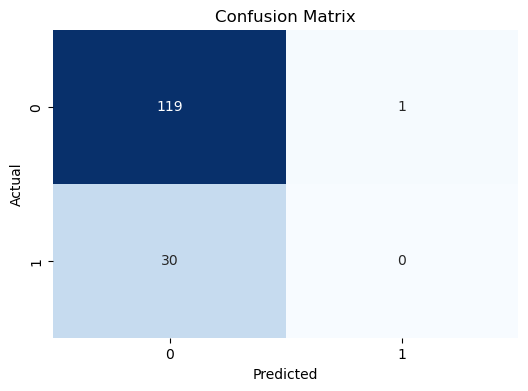

In [46]:
#when i applied Random Forest classifier , i got Training Accuracy Score: 82 ,Test Accuracy Score: 79%
# I gone through hyperparameter tuning process with GridSearchCV, 
#the algorithm will systematically evaluate different combinations of these hyperparameter values to find the combination
#I got Best Parameters: {'max_depth': 7, 'max_features': 0.8, 'max_samples': 0.7, 'n_estimators': 50}
#Training Accuracy Score: 0.831
#Test Accuracy Score: 80.0  it is good model to be considered

# Visualisation
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Adjusting hyperparameters or exploring other algorithms may be necessary to enhance the model's performance.
# The model achieved a training accuracy of 82.44% and a test accuracy of 79.33%. 
# The relatively close values suggest that the model is not overfitting.
# The confusion matrix shows that the model correctly identified 119 instances of "Good" (class 0) but struggled to 
# identify any instances of "Risky" (class 1), resulting in a low recall for class 1.
# The classification report indicates that the model's precision for the "Risky" class (1) is 0%, 
# meaning it predicted all instances as "Good" (class 0).
# The confusion matrix heatmap visually emphasizes the model's difficulty in correctly identifying instances of the "Risky" class